### Downloading Data

To download the data, we will use !wget to download it from IBM Object Storage.


In [ ]:
# Download this file 
#!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/FuelConsumptionCo2.csv"

<h2 id="reading_data">Reading the data in adnd Data exploration </h2>

In [2]:
import os 
os.chdir("C:\\Users\\manka\\Documents\\GitHub\\Machine-learning-quickbook")
df = pd.read_csv("FuelConsumptionCo2.csv")

NameError: name 'pd' is not defined

<h2 id="exploratory_analysis">Exploratory data analysis </h2>

In [1]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_html()

NameError: name 'df' is not defined

Lets select some features to explore more.


we can plot each of these features:


<h2 id="simple_regression">Simple Regression Model</h2>
Linear Regression fits a linear model with coefficients $\theta = (\theta_1, ..., \theta_n)$ to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 


In [ ]:
from sklearn import linear_model
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import os, seaborn as sns

# Get data
os.chdir("C:\\Users\\manka\\Documents\\GitHub\\Machine-learning-quickbook")
df = pd.read_csv("FuelConsumptionCo2.csv")
df.hist()

# Describe independent and dependent variables
ind = ['ENGINESIZE']
dep = ['CO2EMISSIONS']


# Train test split with proportion split
msk = np.random.rand(len(df)) < 0.8
X, Y = df[ind], df[dep]
train_x, test_x, train_y, test_y = np.asanyarray(X[msk]), np.asanyarray(X[~msk]), np.asanyarray(Y[msk]), np.asanyarray(Y[~msk])


# plot distributions 
for j in range(len(dep)):
    fig, axs = plt.subplots(len(ind)//3,3,figsize=(15,5))
    for i in range(len(ind)):
        sns.scatterplot(x=df[ind[i]], y= df[dep[j]], ax=axs[i])

        
# Fit the model
clf = linear_model.LinearRegression()
clf.fit (train_x, train_y)


# Prediction and the error estimation
test_y_hat = clf.predict(test_x)



# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

<h2 id="multiple_regression">Multiple Regression Model</h2>

In [ ]:
from sklearn import linear_model
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import os, seaborn as sns

# Get data
os.chdir("C:\\Users\\manka\\Documents\\GitHub\\Machine-learning-quickbook")
df = pd.read_csv("FuelConsumptionCo2.csv")
df.hist()


# Describe independent and dependent variables
ind = ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']
dep = ['CO2EMISSIONS']


# Train test split with proportion split
msk = np.random.rand(len(df)) < 0.8
X, Y = df[ind], df[dep]
train_x, test_x, train_y, test_y = np.asanyarray(X[msk]), np.asanyarray(X[~msk]), np.asanyarray(Y[msk]), np.asanyarray(Y[~msk])


# plot distributions 
for j in range(len(dep)):
    fig, axs = plt.subplots(len(ind)//3,3,figsize=(15,5))
    for i in range(len(ind)):
        sns.scatterplot(x=df[ind[i]], y= df[dep[j]], ax=axs[i])


# Fit the model
clf = linear_model.LinearRegression()
clf.fit (train_x, train_y)


# Prediction and the error estimation
test_y_hat = clf.predict(test_x)



# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

<h2 id="Polynomial_regression">Polynomial Regression Model</h2>

In [ ]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures


import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import os, seaborn as sns

# Get data
os.chdir("C:\\Users\\manka\\Documents\\GitHub\\Machine-learning-quickbook")
df = pd.read_csv("FuelConsumptionCo2.csv")
df.hist()

# Describe independent and dependent variables
ind = ['ENGINESIZE']
dep = ['CO2EMISSIONS']


# Train test split with proportion split
msk = np.random.rand(len(df)) < 0.8
X, Y = df[ind], df[dep]
train_x, test_x, train_y, test_y = np.asanyarray(X[msk]), np.asanyarray(X[~msk]), np.asanyarray(Y[msk]), np.asanyarray(Y[~msk])


# plot distributions 
for j in range(len(dep)):
    fig, axs = plt.subplots((len(ind)//3)+1,3,figsize=(15,5))
    for i in range(len(ind)):
        sns.scatterplot(x=df[ind[i]], y= df[dep[j]], ax=axs[i])


# Polynomial transformation
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)


# Fit the model
clf = linear_model.LinearRegression()
clf.fit(train_x_poly, train_y)


# Prediction and the error estimation on the transformed test polynomial data
test_x_poly = poly.fit_transform(test_x)
test_y_hat = clf.predict(test_x_poly)



# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

<h2 id="Nonlinear_regression_Polynomial_regressor">Nonlinear Regression Model: Polynomial regressor</h2>

conducting data profiling


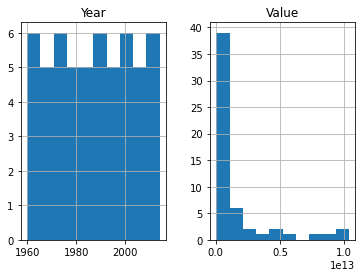

conducting analysis
Polynomial model evaluation
Mean absolute error: 401896729627.84
Residual sum of squares (MSE): 221077703228059839102976.00
R2-score: 0.96


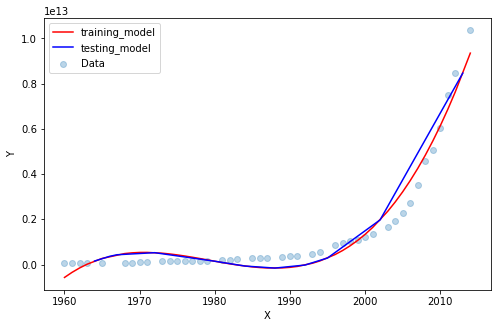

In [2]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
import pandas as pd
from pandas_profiling import ProfileReport

import pylab as pl
import numpy as np
%matplotlib inline
import os, seaborn as sns

# Get data
os.chdir("C:\\Users\\manka\\Documents\\GitHub\\Machine-learning-quickbook")
df = pd.read_csv("china_gdp.csv")

# Data profiling 
print('conducting data profiling')
histogram = df.hist()
plt.show()

# profile = ProfileReport(df)
# profile.to_widgets()

# Analysis
print('conducting analysis')
ind = ['Year']
dep = ['Value']

# Train test split with proportion split
X, Y = df[ind].values, df[dep].values
train_x, test_x, train_y, test_y = train_test_split( X, Y, test_size=0.2, random_state=4)

# need to sort all the points based on X to plot 
train_x, train_y = list(zip(*sorted(zip(train_x, train_y))))
test_x, test_y = list(zip(*sorted(zip(test_x, test_y))))

# Polynomial regressor 
model_1 = make_pipeline(PolynomialFeatures(degree = 3),LinearRegression())
model_1.fit(train_x, train_y)

# predict
train_y_hat = model_1.predict(train_x)
test_y_hat = model_1.predict(test_x)

# Evaluate
print("Polynomial model evaluation")
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )


plt.figure(figsize = (8,5))
plt.scatter(train_x, train_y, alpha = .3, label = 'Data')
plt.plot(train_x, train_y_hat, color = 'red', label = 'training_model')
plt.plot(test_x, test_y_hat, color = 'blue', label = 'testing_model')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()





<h2 id="Nonlinear_regression_Decision_tree_regressor">Nonlinear Regression Model : Descion tree regressor </h2>

conducting data profiling


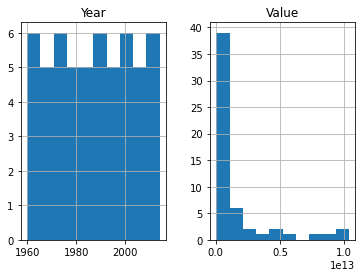

conducting analysis
Decision-tree model evaluation
Mean absolute error: 1666229875716.86
Residual sum of squares (MSE): 12031519547811285209972736.00
R2-score: 0.95


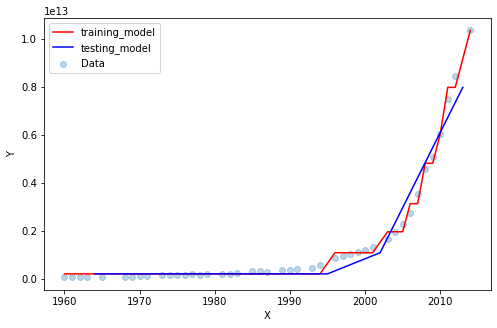

array([1.])

In [18]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
import pandas as pd
from pandas_profiling import ProfileReport

import pylab as pl
import numpy as np
%matplotlib inline
import os, seaborn as sns

# Get data
os.chdir("C:\\Users\\manka\\Documents\\GitHub\\Machine-learning-quickbook")
df = pd.read_csv("china_gdp.csv")

# Data profiling 
print('conducting data profiling')
histogram = df.hist()
plt.show()

# profile = ProfileReport(df)
# profile.to_widgets()

# Analysis
print('conducting analysis')
ind = ['Year']
dep = ['Value']

# Train test split with proportion split
X, Y = df[ind].values, df[dep].values
train_x, test_x, train_y, test_y = train_test_split( X, Y, test_size=0.2, random_state=4)


#decisiontree regressor 
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth = 3)
model.fit(train_x, train_y)

# predict
train_y_hat = model.predict(train_x)
test_y_hat = model.predict(test_x)

# Evaluate
print("Decision-tree model evaluation")
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

# need to sort all the points based on X to plot 
train_x, train_y, train_y_hat = list(zip(*sorted(zip(train_x, train_y, train_y_hat))))
test_x, test_y, test_y_hat = list(zip(*sorted(zip(test_x, test_y, test_y_hat))))

plt.figure(figsize = (8,5))
plt.scatter(train_x, train_y, alpha = .3, label = 'Data')
plt.plot(train_x, train_y_hat, color = 'red', label = 'training_model')
plt.plot(test_x, test_y_hat, color = 'blue', label = 'testing_model')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


# Linear interpolation model
# from scipy import interpolate
# tck = interpolate.splrep(train_x, train_y, k=1, s=1, t = [35])
# plt.plot(x,interpolate.splev(train_x, tck, der=0), color = 'red', label = 'Model')

importances = model.feature_importances_
importances


<h2 id="KNN">KNN Model</h2>

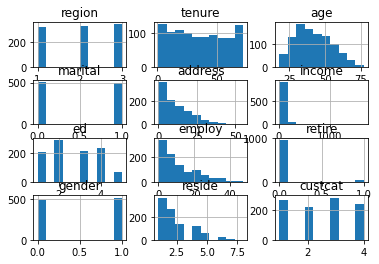

Train set Accuracy:  0.55
Test set Accuracy:  0.3


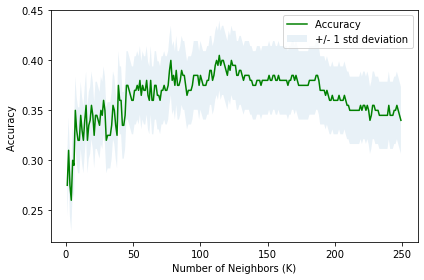

In [4]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import NullFormatter
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import pandas as pd
from pandas_profiling import ProfileReport

import pylab as pl
import numpy as np
%matplotlib inline
import os, seaborn as sns

# Get data
os.chdir("C:\\Users\\manka\\Documents\\GitHub\\Machine-learning-quickbook")
df = pd.read_csv("teleCust1000t.csv")
df.hist()
plt.show()

# profile = ProfileReport(df)
# profile.to_widgets()

ind = ['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']
dep = ['custcat']

# Train test split with proportion split
X, Y = df[ind].values, df[dep].values.ravel()
train_x, test_x, train_y, test_y = train_test_split( X, Y, test_size=0.2, random_state=4)


# Testing with a random value of K
k = 5
model = KNeighborsClassifier(n_neighbors = k).fit(train_x, train_y)

# Predict 
train_y_hat = model.predict(train_x)
test_y_hat = model.predict(test_x)
  
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(train_y, train_y_hat))
print("Test set Accuracy: ", metrics.accuracy_score(test_y, test_y_hat))



# Finding the best K    
k = []
K = 250
mean_accuracy = np.zeros((K-1))
std_accuracy = np.zeros((K-1))

for k in range(1,K):  
    #Train Model and Predict  
    model = KNeighborsClassifier(n_neighbors = k).fit(train_x, train_y)
    test_y_hat = model.predict(test_x)    
    mean_accuracy[k-1] = metrics.accuracy_score(test_y, test_y_hat)
    std_accuracy[k-1] = np.std(test_y_hat==test_y)/np.sqrt(test_y_hat.shape[0])
    

    
plt.plot(range(1,K), mean_accuracy,'g')
plt.fill_between(range(1,K), mean_accuracy - 1 * std_accuracy, mean_accuracy + 1 * std_accuracy, alpha=0.10)
plt.legend(('Accuracy ', '+/- 1 std deviation'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

<h2 id="Decision_Tree">Decision Tree Model</h2>

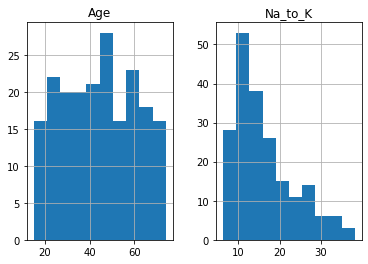

DecisionTrees's Accuracy in training data:  1.0
DecisionTrees's Accuracy in testing data:  0.95


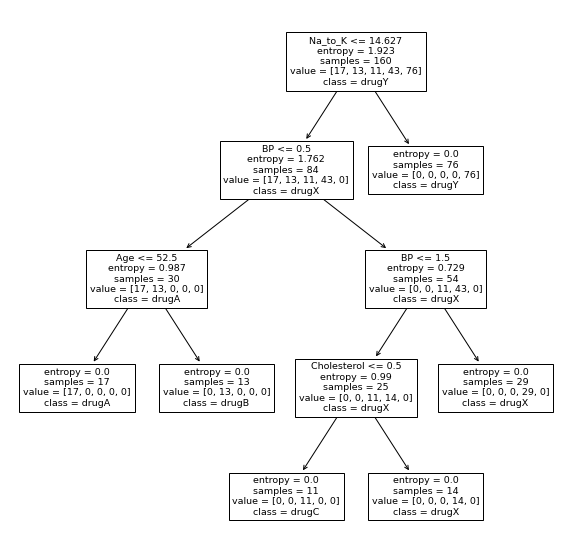

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import tree


df = pd.read_csv("drug200.csv", delimiter=",")
df.hist()
plt.show()

# profile = ProfileReport(df)
# profile.to_widgets()


# Encode labels for categorical variables
le_sex = preprocessing.LabelEncoder()
sex_class_names = ['F','M']
le_sex.fit(sex_class_names)
df['Sex'] = le_sex.transform(df['Sex']) 


le_BP = preprocessing.LabelEncoder()
BP_class_names = [ 'LOW', 'NORMAL', 'HIGH']
le_BP.fit(BP_class_names)
df['BP'] = le_BP.transform(df['BP'])


le_Chol = preprocessing.LabelEncoder()
chol_class_names = [ 'NORMAL', 'HIGH']
le_Chol.fit(chol_class_names)
df['Cholesterol'] = le_Chol.transform(df['Cholesterol']) 


le_Drug = preprocessing.LabelEncoder()
drug_class_names = [ 'drugA', 'drugB', 'drugC', 'drugX','drugY']
le_Drug.fit(drug_class_names)
df['Drug'] = le_Drug.transform(df['Drug']) 



ind = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
dep = ['Drug']

# Train test split with proportion split
X, Y  = df[ind].values, df[dep].values
train_x, test_x, train_y, test_y = train_test_split( X, Y, test_size=0.2, random_state=4)


# # Decision tree classifier 
model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
model.fit(train_x, train_y)

# visualize the model
plt.figure(figsize=(10,10))
tree.plot_tree(model, feature_names = ind, class_names = drug_class_names)

train_y_hat = model.predict(train_x)
test_y_hat = model.predict(test_x)


# Metrics
print("DecisionTrees's Accuracy in training data: ", metrics.accuracy_score(train_y, train_y_hat))
print("DecisionTrees's Accuracy in testing data: ", metrics.accuracy_score(test_y, test_y_hat))




<h2 id="Logistic_regression_model">Logistic Regression Model</h2>

cost function for the logistic regression

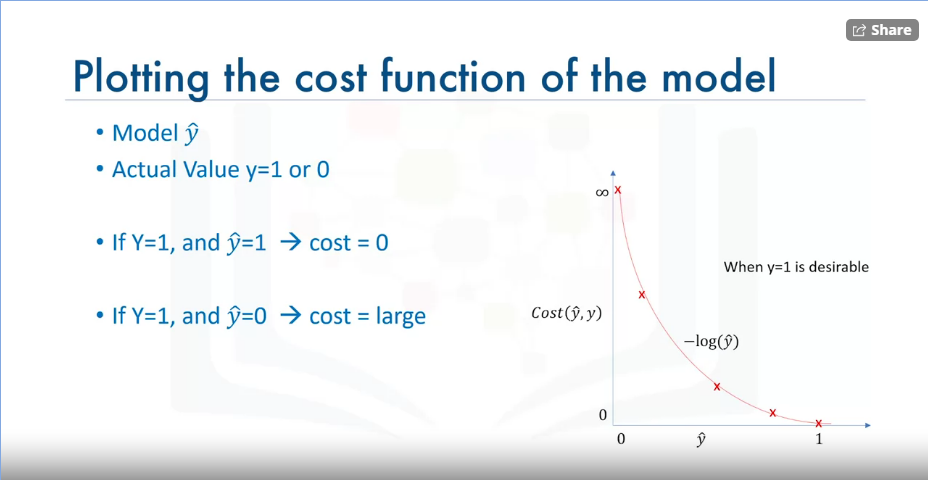

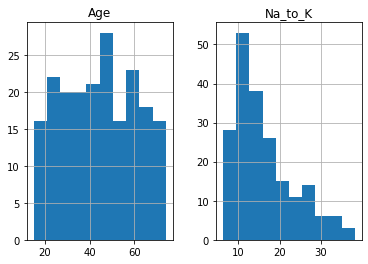

DecisionTrees's Accuracy in training data:  1.0
DecisionTrees's Accuracy in testing data:  0.95


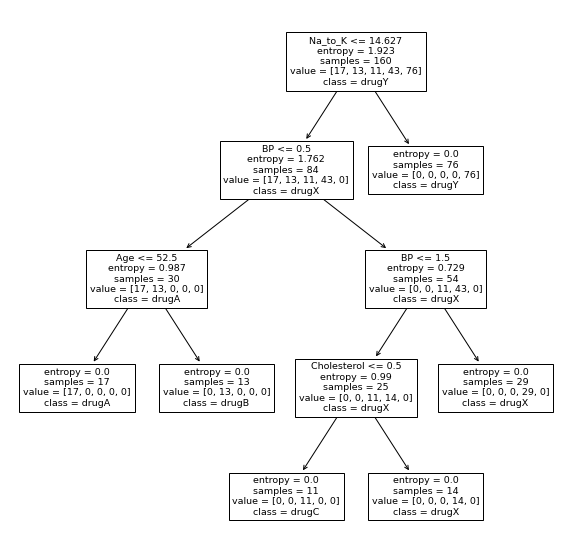

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import tree


df = pd.read_csv("drug200.csv", delimiter=",")
df.hist()
plt.show()

# profile = ProfileReport(df)
# profile.to_widgets()


# Encode labels for categorical variables
le_sex = preprocessing.LabelEncoder()
sex_class_names = ['F','M']
le_sex.fit(sex_class_names)
df['Sex'] = le_sex.transform(df['Sex']) 


le_BP = preprocessing.LabelEncoder()
BP_class_names = [ 'LOW', 'NORMAL', 'HIGH']
le_BP.fit(BP_class_names)
df['BP'] = le_BP.transform(df['BP'])


le_Chol = preprocessing.LabelEncoder()
chol_class_names = [ 'NORMAL', 'HIGH']
le_Chol.fit(chol_class_names)
df['Cholesterol'] = le_Chol.transform(df['Cholesterol']) 


le_Drug = preprocessing.LabelEncoder()
drug_class_names = [ 'drugA', 'drugB', 'drugC', 'drugX','drugY']
le_Drug.fit(drug_class_names)
df['Drug'] = le_Drug.transform(df['Drug']) 



ind = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
dep = ['Drug']

# Train test split with proportion split
X, Y  = df[ind].values, df[dep].values
train_x, test_x, train_y, test_y = train_test_split( X, Y, test_size=0.2, random_state=4)


# # Decision tree classifier 
model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
model.fit(train_x, train_y)

# visualize the model
plt.figure(figsize=(10,10))
tree.plot_tree(model, feature_names = ind, class_names = drug_class_names)

train_y_hat = model.predict(train_x)
test_y_hat = model.predict(test_x)


# Metrics
print("DecisionTrees's Accuracy in training data: ", metrics.accuracy_score(train_y, train_y_hat))
print("DecisionTrees's Accuracy in testing data: ", metrics.accuracy_score(test_y, test_y_hat))


